# 0. Basic



In [2]:
import torch

torch.__version__

'2.4.1+cu121'

In [3]:
# 초기화 x

x = torch.empty(4,2)
print(x)

tensor([[ 2.3822e-44,  4.5277e+21],
        [-1.7383e+38,  3.1158e-41],
        [ 5.8335e-36,  3.1159e-41],
        [ 0.0000e+00,  0.0000e+00]])


In [4]:
# 초기화 rand

x=torch.rand(4,2)
print(x)

tensor([[0.9843, 0.8475],
        [0.9427, 0.6654],
        [0.3459, 0.8516],
        [0.1882, 0.1037]])


In [5]:
# 0으로 초기화

x=torch.zeros(4,2,dtype=torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


In [6]:
# 값으로 초기화 1

x=torch.tensor([3, 2.3])
print(x)

tensor([3.0000, 2.3000])


In [7]:
# 값으로 초기화 2

x=torch.ones(2, 4, dtype=torch.double)
print(x)

# new_ones: 기존 tensor의 속성을 상속 받아 1로 채운다

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


In [8]:
# rand tensor, x의 크기 상속

x=torch.rand_like(x, dtype=torch.float)
print(x)

tensor([[0.9091, 0.9687, 0.7147, 0.2587],
        [0.0617, 0.9403, 0.4253, 0.0305]])


In [9]:
# tensor 크기 계싼

print(x.size())

torch.Size([2, 4])


# 1. Dtype

In [10]:
# float

ft = torch.FloatTensor([1,2,3])
print(ft)
print(ft.dtype)

tensor([1., 2., 3.])
torch.float32


In [11]:
# casting method 1

print(ft.short())
print(ft.int())
print(ft.long())

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [12]:
# int

it = torch.IntTensor([1,2,3])
print(it)
print(it.dtype)

tensor([1, 2, 3], dtype=torch.int32)
torch.int32


In [13]:
# casting method 2

print(it.float())
print(it.double())
print(it.half())

tensor([1., 2., 3.])
tensor([1., 2., 3.], dtype=torch.float64)
tensor([1., 2., 3.], dtype=torch.float16)


# 2. CUDA Tensor

In [14]:
x = torch.rand(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.6690])
0.6689575910568237
torch.float32


In [15]:
# torch.device를 이용한 device 선언

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [16]:
y = torch.ones_like(x, device=device)
print(y)

# 같은 device에서만 연산 가능

x = x.to(device)
print(x)
z = x + y
print(z.to('cpu', torch.double))

tensor([1.], device='cuda:0')
tensor([0.6690], device='cuda:0')
tensor([1.6690], dtype=torch.float64)


# 3. nd Tensor

In [17]:
# 0d

t0 = torch.tensor(0)
print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(0)


In [18]:
# 1d

t1 = torch.tensor([1,2,3])
print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


In [19]:
# 2d

t2 = torch.tensor([[1,2,3]
                   ,[4,5,6]
                   ,[7,8,9]])
print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([3, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [20]:
# 3d, 흑백 이미지에서 자주 사용

t3 = torch.tensor([[[1,2,3]
                    ,[4,5,6]
                    ,[7,8,9]]
                   ,[[1,2,3]
                     ,[4,5,6]
                     ,[7,8,9]]])
print(t3.ndim)
print(t3.shape)
print(t3)

3
torch.Size([2, 3, 3])
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])


In [21]:
# 4d, 컬러 이미지에서 자주 사용
# 5d, 비디오에서 자주 사용

# 4. Tensor operations

In [22]:
import math

a = torch.rand(1,2) * 2 - 1
print(a)
print(torch.abs(a)) # 절대값
print(torch.ceil(a)) # 올림
print(torch.floor(a)) # 내림
print(torch.clamp(a, -0.5, 0.5)) # 특정 구간 사이에 오도록 조정

tensor([[-0.5767,  0.3439]])
tensor([[0.5767, 0.3439]])
tensor([[-0., 1.]])
tensor([[-1.,  0.]])
tensor([[-0.5000,  0.3439]])


In [23]:
print(a)
print(torch.max(a)) # max
print(torch.min(a)) # min
print(torch.mean(a)) # 평균
print(torch.std(a)) # 표준편차
print(torch.var(a)) # 분산
print(torch.median(a)) # 중앙값
print(torch.unique(torch.tensor([1,2,3,1,2,3]))) # 중복 제거

tensor([[-0.5767,  0.3439]])
tensor(0.3439)
tensor(-0.5767)
tensor(-0.1164)
tensor(0.6509)
tensor(0.4237)
tensor(-0.5767)
tensor([1, 2, 3])


In [24]:
# argmax, argmin (index도 반환)

x = torch.rand(2,2)
print(x)
print(x.max(dim=0)) # 행 기준
print(x.max(dim=1)) # 열 기준
print(x.min(dim=0)) # 행 기준
print(x.min(dim=1)) # 열 기준

tensor([[0.6569, 0.0077],
        [0.6756, 0.5676]])
torch.return_types.max(
values=tensor([0.6756, 0.5676]),
indices=tensor([1, 1]))
torch.return_types.max(
values=tensor([0.6569, 0.6756]),
indices=tensor([0, 0]))
torch.return_types.min(
values=tensor([0.6569, 0.0077]),
indices=tensor([0, 0]))
torch.return_types.min(
values=tensor([0.0077, 0.5676]),
indices=tensor([1, 1]))


In [25]:
a = torch.rand(3,3,3)
print(a)
print(a.max(dim=0))
print

tensor([[[0.0412, 0.7969, 0.0021],
         [0.0722, 0.3819, 0.6819],
         [0.2590, 0.8382, 0.7766]],

        [[0.9110, 0.8573, 0.5063],
         [0.8061, 0.6894, 0.5993],
         [0.7745, 0.5305, 0.3032]],

        [[0.0898, 0.9453, 0.9851],
         [0.3013, 0.1746, 0.3516],
         [0.6360, 0.2835, 0.6399]]])
torch.return_types.max(
values=tensor([[0.9110, 0.9453, 0.9851],
        [0.8061, 0.6894, 0.6819],
        [0.7745, 0.8382, 0.7766]]),
indices=tensor([[1, 2, 2],
        [1, 1, 0],
        [1, 0, 0]]))


In [26]:
# add

y = torch.rand(2,2)
print(y)
print(x+y)
print(torch.add(x,y))
print(x.add(y))

tensor([[0.1673, 0.2013],
        [0.0087, 0.4581]])
tensor([[0.8243, 0.2089],
        [0.6843, 1.0257]])
tensor([[0.8243, 0.2089],
        [0.6843, 1.0257]])
tensor([[0.8243, 0.2089],
        [0.6843, 1.0257]])


In [27]:
# 특정 tensor에 결과 삽입

result = torch.empty(2,10)
torch.add(x,y, out=result)
print(result)

tensor([[0.8243, 0.2089],
        [0.6843, 1.0257]])


<ipython-input-27-45cfda4daf54>:4: UserWarning: An output with one or more elements was resized since it had shape [2, 10], which does not match the required output shape [2, 2]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at ../aten/src/ATen/native/Resize.cpp:28.)
  torch.add(x,y, out=result)


In [28]:
#in-place 방식

print(x)
print(y)
y.add_(x)
print(y)

tensor([[0.6569, 0.0077],
        [0.6756, 0.5676]])
tensor([[0.1673, 0.2013],
        [0.0087, 0.4581]])
tensor([[0.8243, 0.2089],
        [0.6843, 1.0257]])


In [29]:
# sub, mul, div, matmul(mm) 동일
print(x)
print(y)
z = torch.mm(x,y) # 행렬곱
print(z)

tensor([[0.6569, 0.0077],
        [0.6756, 0.5676]])
tensor([[0.8243, 0.2089],
        [0.6843, 1.0257]])
tensor([[0.5467, 0.1451],
        [0.9453, 0.7233]])


# 5. Tensor manipulations

In [30]:
# indexing&slicing

x = torch.tensor([[1,2],
                 [3,4]])
print(x[0,0])
print(x[:,0])
print(x[0,:])
print(x[:, -1])
print(x[-2,:])


tensor(1)
tensor([1, 3])
tensor([1, 2])
tensor([2, 4])
tensor([1, 2])


In [31]:
# view(), shape 변경, elements 개수는 고정

x = torch.randn(4,4)
print(x)
y = x.view(16)
print(y)
z = x.view(2,8)
print(z)


tensor([[ 1.4732, -0.2813, -0.0330, -0.8007],
        [ 0.8973, -1.0302, -1.8588, -2.4422],
        [ 1.4511, -0.5046, -0.3171, -1.5246],
        [-0.2066, -0.3878,  1.6682,  1.2424]])
tensor([ 1.4732, -0.2813, -0.0330, -0.8007,  0.8973, -1.0302, -1.8588, -2.4422,
         1.4511, -0.5046, -0.3171, -1.5246, -0.2066, -0.3878,  1.6682,  1.2424])
tensor([[ 1.4732, -0.2813, -0.0330, -0.8007,  0.8973, -1.0302, -1.8588, -2.4422],
        [ 1.4511, -0.5046, -0.3171, -1.5246, -0.2066, -0.3878,  1.6682,  1.2424]])


In [32]:
# item(), scalar value 가져오기

print(x[1,1].item())

-1.0302406549453735


In [33]:
# squeeze, 차원 축소

tensor = torch.rand(1,3,3)
print(tensor)
t = tensor.squeeze()
print(t)
print(tensor.shape)
print(t.shape)

tensor([[[0.1152, 0.3445, 0.6404],
         [0.9129, 0.6225, 0.5871],
         [0.3372, 0.3743, 0.8221]]])
tensor([[0.1152, 0.3445, 0.6404],
        [0.9129, 0.6225, 0.5871],
        [0.3372, 0.3743, 0.8221]])
torch.Size([1, 3, 3])
torch.Size([3, 3])


In [34]:
# unsqueeze, 차원 확대

t0 = t.unsqueeze(dim=0)
print(t0)
print(t0.shape)
t1 = t.unsqueeze(dim=1)
print(t1)
print(t1.shape)

tensor([[[0.1152, 0.3445, 0.6404],
         [0.9129, 0.6225, 0.5871],
         [0.3372, 0.3743, 0.8221]]])
torch.Size([1, 3, 3])
tensor([[[0.1152, 0.3445, 0.6404]],

        [[0.9129, 0.6225, 0.5871]],

        [[0.3372, 0.3743, 0.8221]]])
torch.Size([3, 1, 3])


In [35]:
# stack, tensor 상위 차원으로 결합

x = torch.FloatTensor([1,4])
y = torch.FloatTensor([2,5])
z = torch.FloatTensor([3,6])

s = torch.stack([x,y,z])

print(s)
print(s.shape)

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
torch.Size([3, 2])


In [36]:
# concat, tensor 같은 차원 결합

c0 = torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0)
print(c0)
print(c0.shape)

c1 = torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=1)
print(c1)
print(c1.shape)

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
torch.Size([3, 2])
tensor([[1., 4., 2., 5., 3., 6.]])
torch.Size([1, 6])


In [37]:
# chunk, tensor 분할, 개수로 나눔

tensor = torch.rand(3, 6)
print(tensor)

t01, t02, t03 = torch.chunk(tensor, 3, dim=0)
print(t01)
print(t02)
print(t03)

t11, t12, t13 = torch.chunk(tensor, 3, dim=1)
print(t11)
print(t12)
print(t13)

tensor([[0.8294, 0.7496, 0.7175, 0.7304, 0.4755, 0.5813],
        [0.0738, 0.2037, 0.6710, 0.6246, 0.9686, 0.5969],
        [0.7827, 0.9885, 0.0365, 0.7474, 0.6011, 0.6496]])
tensor([[0.8294, 0.7496, 0.7175, 0.7304, 0.4755, 0.5813]])
tensor([[0.0738, 0.2037, 0.6710, 0.6246, 0.9686, 0.5969]])
tensor([[0.7827, 0.9885, 0.0365, 0.7474, 0.6011, 0.6496]])
tensor([[0.8294, 0.7496],
        [0.0738, 0.2037],
        [0.7827, 0.9885]])
tensor([[0.7175, 0.7304],
        [0.6710, 0.6246],
        [0.0365, 0.7474]])
tensor([[0.4755, 0.5813],
        [0.9686, 0.5969],
        [0.6011, 0.6496]])


In [38]:
# split, tensor 분할, 크기로 나눔

tensor = torch.rand(3, 6)
print(tensor)

t1, t2, t3 = torch.split(tensor, 1, dim=0)
print(t1)
print(t2)
print(t3)

t4, t5 = torch.split(tensor, 3, dim=1)
print(t4)
print(t5)

tensor([[0.3470, 0.3696, 0.0429, 0.4393, 0.2137, 0.2258],
        [0.0354, 0.8821, 0.9443, 0.3161, 0.3245, 0.6584],
        [0.3529, 0.7071, 0.7358, 0.9310, 0.4443, 0.0714]])
tensor([[0.3470, 0.3696, 0.0429, 0.4393, 0.2137, 0.2258]])
tensor([[0.0354, 0.8821, 0.9443, 0.3161, 0.3245, 0.6584]])
tensor([[0.3529, 0.7071, 0.7358, 0.9310, 0.4443, 0.0714]])
tensor([[0.3470, 0.3696, 0.0429],
        [0.0354, 0.8821, 0.9443],
        [0.3529, 0.7071, 0.7358]])
tensor([[0.4393, 0.2137, 0.2258],
        [0.3161, 0.3245, 0.6584],
        [0.9310, 0.4443, 0.0714]])


# 6. Tensor <-> Numpy

In [39]:
a = torch.ones(7)
print(a)
b = a.numpy()
print(b)

tensor([1., 1., 1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1. 1. 1.]


In [40]:
# tensor가 CPU에 위치할 때는 instance가 메모리를 공유하게 됨

a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [41]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


# 7. Autograd

In [42]:
# torch의 requires_grad를 true로 해야 연산을 추적함 (default = False)

a = torch.rand(3,3)
a = a * 3
print(a)
print(a.requires_grad)

a.requires_grad_(True)
print(a.requires_grad)

tensor([[2.1859, 0.0110, 1.9294],
        [2.2095, 2.6543, 2.5206],
        [2.2108, 2.5395, 2.9625]])
False
True


In [43]:
b = (a*a).sum()
print(b)
print(b.grad_fn)

c = torch.rand(3,3)
d = (c*c).sum()
print(d.grad_fn)

tensor(46.8947, grad_fn=<SumBackward0>)
None


In [44]:
# gradient calculation

x = torch.ones(3, 3, requires_grad=True)
print(x)

y = x + 5
print(y)

z = y * y
print(z)

out = z.mean()
print(out)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)
tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>)
tensor(36., grad_fn=<MeanBackward0>)


In [45]:
# 역전파 수행

print(out)
out.backward()

tensor(36., grad_fn=<MeanBackward0>)


In [46]:
# grad 속성에 저장됨

print(x)
print(x.grad)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])


In [47]:
x = torch.randn(3, requires_grad=True) # 표준정규분포에서 난수 생성, X~N(0,1)
y = x * 2

while y.data.norm() < 1000: # norm을 구함, default는 유클리드 norm (vector length)
  y = y * 2
print(y)

tensor([  146.0379,   591.1412, -1269.9929], grad_fn=<MulBackward0>)


In [48]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v) # 벡터-야코비안 곱

print(x.grad)

tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])


In [49]:
# torch.no_grad()

print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
  print((x ** 2).requires_grad)

True
True
False


In [50]:
print(x.requires_grad)
y = x.detach() # content 유지하면서 detach된 tensor 생성
print(y.requires_grad)
print(x.eq(y).all()) # eq(y): 요소별로 비교하여 boolean tensor 생성, all로 요소 전체가 같은지 반환

True
False
tensor(True)


In [51]:
# 예제

a = torch.ones(2, 2, requires_grad=True)
print(a)
print(a.data)
print(a.grad)
print(a.grad_fn)

b = a + 2
print(b)
print(b.grad_fn)

c = b ** 2
print(c)
print(c.grad_fn)

out = c.sum()
print(out)
print(out.grad_fn)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[1., 1.],
        [1., 1.]])
None
None
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)
tensor(36., grad_fn=<SumBackward0>)


In [52]:
out.backward()
print(a.data)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
tensor([[6., 6.],
        [6., 6.]])
None


In [53]:
print(b.data)
print(b.grad)
print(b.grad_fn)

tensor([[3., 3.],
        [3., 3.]])
None


<ipython-input-53-7222c1aec66c>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(b.grad)


In [54]:
print(c.data)
print(c.grad)
print(c.grad_fn)

tensor([[9., 9.],
        [9., 9.]])
None


<ipython-input-54-f6ca42a4f63f>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(c.grad)


In [55]:
print(out.data)
print(out.grad)
print(out.grad_fn)

tensor(36.)
None


<ipython-input-55-85e75c577388>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(out.grad)


# 8. 데이터 준비

In [56]:
# torch.utils.data의 Dataset과 DataLoader

from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision import datasets

In [57]:
# data 전처리를 위한 transform 선언

mnist_transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize((0.5,), (1.0,))])

In [58]:
trainset = datasets.MNIST(root='/content/',
                          train=True,
                          download=True,
                          transform=mnist_transform)
testset = datasets.MNIST(root='/content/',
                         train=False,
                         download=True,
                         transform=mnist_transform)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 16246128.54it/s]


Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 492055.48it/s]


Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 3910508.89it/s]


Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 4010637.64it/s]

Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [59]:
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)

In [60]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
print(images.shape)
print(labels.shape)

torch.Size([8, 1, 28, 28])
torch.Size([8])


In [61]:
torch_image = torch.squeeze(images[0])
print(torch_image.shape)

torch.Size([28, 28])


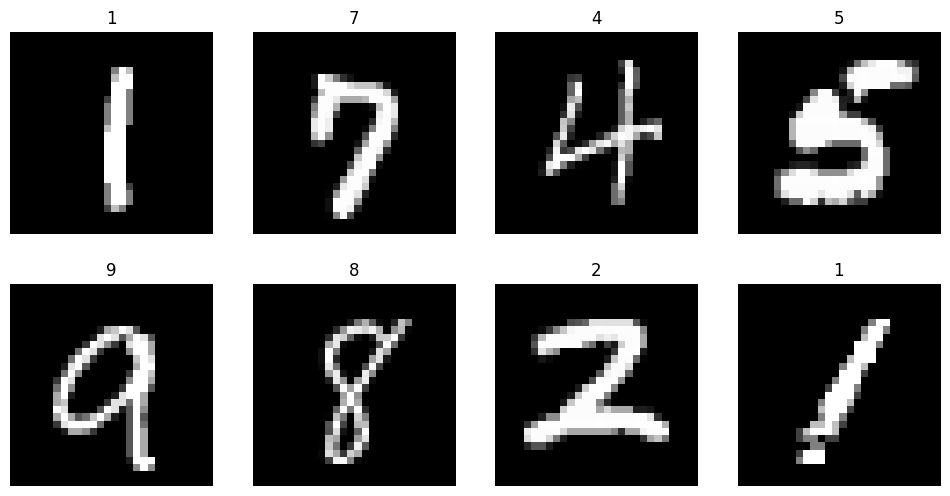

In [62]:
import matplotlib.pyplot as plt


figure = plt.figure(figsize=(12,6)) # 전체 사이즈
cols, rows = 4, 2
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(trainset), size=(1,)).item()
  img, label = trainset[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(img.squeeze(), cmap='gray')
plt.show()

# 9. Neural Network

In [63]:
# torch.nn, weights ,bias 자동 생성

import torch.nn as nn

In [64]:
# nn.Linear

input = torch.randn(128, 20)

linear = nn.Linear(20, 50)
print(linear)

output = linear(input)
print(output)
print(output.size())


Linear(in_features=20, out_features=50, bias=True)
tensor([[-0.3131, -0.2969,  0.2458,  ...,  0.0335,  0.6120,  0.6644],
        [ 0.3756, -0.6377, -0.3222,  ..., -1.0703, -0.5544,  0.1611],
        [ 0.0344,  0.1398, -0.2565,  ..., -0.4433,  0.0107, -0.2555],
        ...,
        [ 0.6906, -0.0054, -1.1169,  ..., -1.1916,  0.6234, -0.4028],
        [-0.6235, -0.7542,  0.5798,  ...,  0.4549, -0.6322, -0.2070],
        [-0.3535,  0.1253, -1.2048,  ...,  0.3726, -0.2193, -0.2963]],
       grad_fn=<AddmmBackward0>)
torch.Size([128, 50])


In [65]:
# nn.Conv2d, in_channel, out_channel, kernel_size, stride, padding

input = torch.randn(20, 16, 50, 100)
print(input.size())

conv1 = nn.Conv2d(16, 32, 3, stride=2)
conv2 = nn.Conv2d(16, 33, (3, 5), stride=(2,1), padding=(4,2))
conv3 = nn.Conv2d(16, 33, (3, 5), stride=(2,1), padding=(4,2), dilation=(3,1))

print(conv1)
print(conv2)
print(conv3)

output = conv3(input)
print(output.size())

torch.Size([20, 16, 50, 100])
Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2))
Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))
torch.Size([20, 33, 26, 100])
